## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path('Resources/bitstamp.csv'),index_col = 'Timestamp', infer_datetime_format = True, parse_dates = True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path('Resources/coinbase.csv'),index_col='Timestamp',parse_dates=True,infer_datetime_format=True)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close'] = bitstamp['Close'].str.replace("$","")

C:\Users\peter\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp['Close'] = bitstamp['Close'].astype('float')

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
# First review and count duplicates
bitstamp.duplicated().sum()

# Second drop duplicates from bitstamp
bitstamp = bitstamp.drop_duplicates()

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
# First, drop NaNs
coinbase = coinbase.dropna()
# Second, remove $ from the Close column
coinbase['Close'] = coinbase['Close'].str.replace("$","")
# Third, change type of column Close to float
coinbase['Close'] = coinbase['Close'].astype('float')
# Fourth, evaluate duplicates
coinbase.duplicated().sum()
# Finally, drop any duplicates
coinbase = coinbase.drop_duplicates()

C:\Users\peter\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [11]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = pd.DataFrame(bitstamp.loc[:,'Close'])

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = pd.DataFrame(coinbase.loc[:,'Close'])

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [13]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [14]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

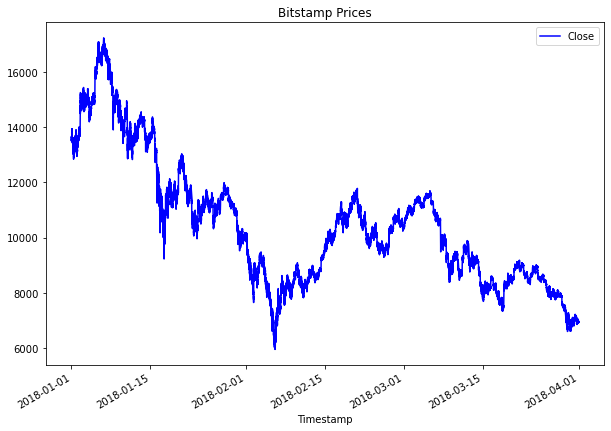

In [15]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize = (10,7), title = 'Bitstamp Prices', color = 'blue')

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

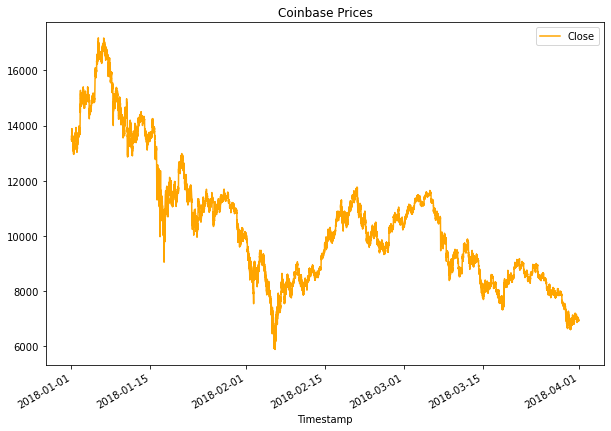

In [16]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize = (10,7), title = 'Coinbase Prices', color = 'orange')

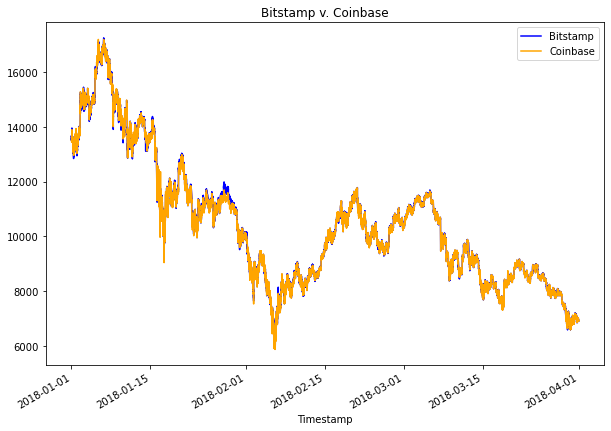

In [17]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax = bitstamp_sliced.plot(legend = True, figsize = (10,7), title = 'Bitstamp v. Coinbase', color = 'blue', label = 'Bitstamp')
coinbase_sliced.plot(legend = True, figsize = (10,7), color = 'orange', label = 'Coinbase', ax = ax)
ax.legend(['Bitstamp','Coinbase'])

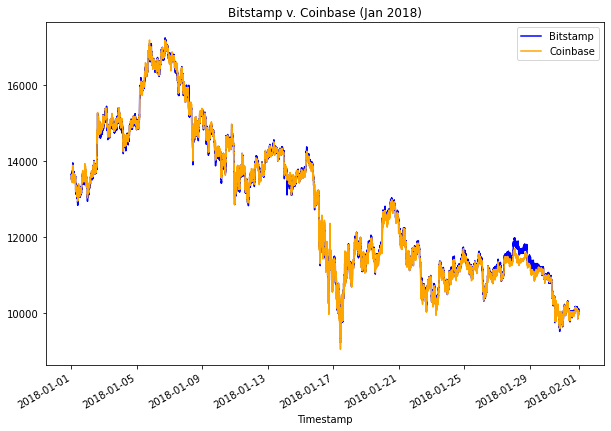

In [18]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax = bitstamp_sliced.loc['2018-01-01':'2018-01-31'].plot(legend = True, figsize = (10,7), title = 'Bitstamp v. Coinbase (Jan 2018)', color = 'blue', label = 'Bitstamp')
coinbase_sliced.loc['2018-01-01':'2018-01-31'].plot(legend = True, figsize = (10,7), color = 'orange', label = 'Coinbase', ax = ax)
ax.legend(['Bitstamp','Coinbase'])

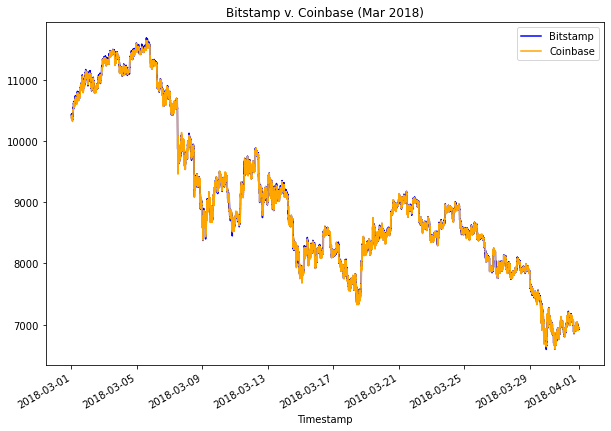

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
ax = bitstamp_sliced.loc['2018-03-01':'2018-03-31'].plot(legend = True, figsize = (10,7), title = 'Bitstamp v. Coinbase (Mar 2018)', color = 'blue', label = 'Bitstamp')
coinbase_sliced.loc['2018-03-01':'2018-03-31'].plot(legend = True, figsize = (10,7), color = 'orange', label = 'Coinbase', ax = ax)
ax.legend(['Bitstamp','Coinbase'])

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

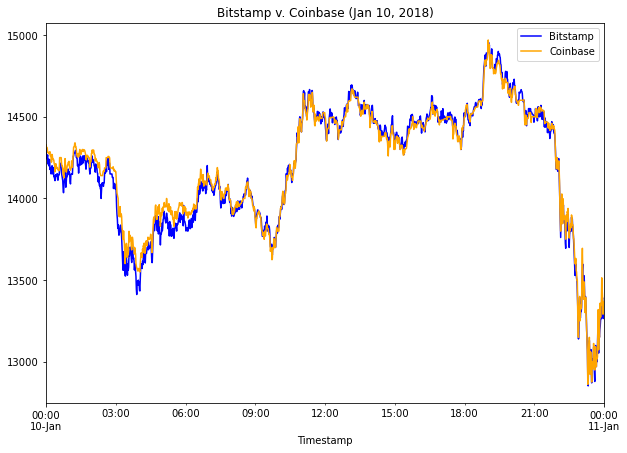

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = bitstamp_sliced.loc['2018-01-10 00:00:00':'2018-01-11 00:00:00'].plot(legend = True, figsize = (10,7), title = 'Bitstamp v. Coinbase (Jan 10, 2018)', color = 'blue', label = 'Bitstamp')
coinbase_sliced.loc['2018-01-10 00:00:00':'2018-01-11 00:00:00'].plot(legend = True, figsize = (10,7), color = 'orange', label = 'Coinbase', ax = ax)
ax.legend(['Bitstamp','Coinbase'])

In [21]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced.loc['2018-01-10 00:00:00':'2018-01-11 00:00:00'] - bitstamp_sliced.loc['2018-01-10 00:00:00':'2018-01-11 00:00:00']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

,Close
count,1441.000000
mean,15.996586
std,45.858747
min,-78.810000
25%,-17.770000
50%,7.000000
75%,46.530000
max,192.000000


<AxesSubplot:title={'center':'Arbitrage Spread - Jan 10, 2018'}>

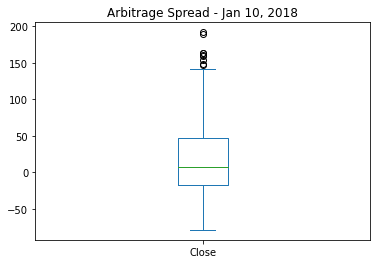

In [22]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind = 'box',title = 'Arbitrage Spread - Jan 10, 2018')

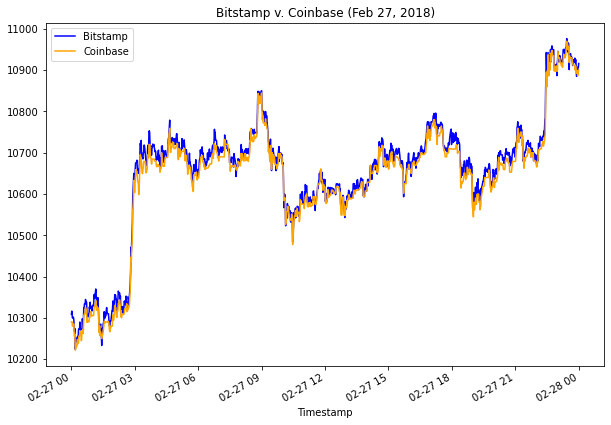

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = bitstamp_sliced.loc['2018-02-27 00:00:00':'2018-02-28 00:00:00'].plot(legend = True, figsize = (10,7), title = 'Bitstamp v. Coinbase (Feb 27, 2018)', color = 'blue', label = 'Bitstamp')
coinbase_sliced.loc['2018-02-27 00:00:00':'2018-02-28 00:00:00'].plot(legend = True, figsize = (10,7), color = 'orange', label = 'Coinbase', ax = ax)
ax.legend(['Bitstamp','Coinbase'])

In [24]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-27 00:00:00':'2018-02-28 00:00:00'] - coinbase_sliced.loc['2018-02-27 00:00:00':'2018-02-28 00:00:00']

# Generate summary statistics 
arbitrage_spread_middle.describe()

,Close
count,1436.000000
mean,14.260641
std,10.748043
min,-35.030000
25%,7.675000
50%,14.235000
75%,20.982500
max,51.550000


<AxesSubplot:title={'center':'Arbitrage Spread - Feb 27, 2018'}>

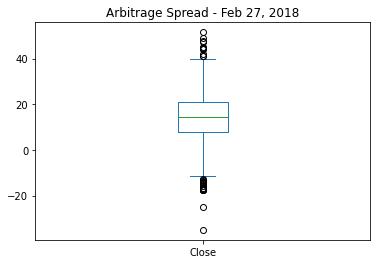

In [25]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind = 'box', title = 'Arbitrage Spread - Feb 27, 2018')

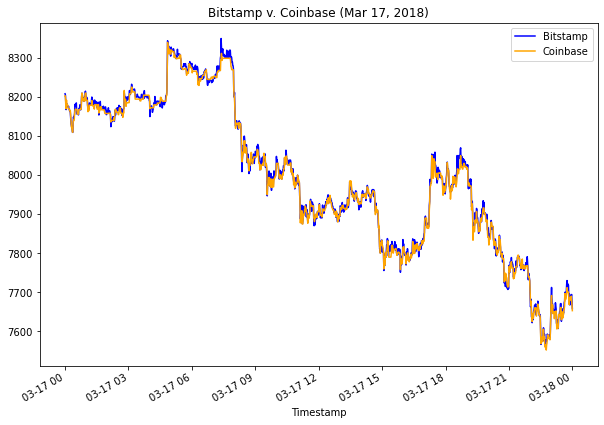

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = bitstamp_sliced.loc['2018-03-17 00:00:00':'2018-03-18 00:00:00'].plot(legend = True, figsize = (10,7), title = 'Bitstamp v. Coinbase (Mar 17, 2018)', color = 'blue', label = 'Bitstamp')
coinbase_sliced.loc['2018-03-17 00:00:00':'2018-03-18 00:00:00'].plot(legend = True, figsize = (10,7), color = 'orange', label = 'Coinbase', ax = ax)
ax.legend(['Bitstamp','Coinbase'])

In [27]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-17 00:00:00':'2018-03-18 00:00:00'] - coinbase_sliced.loc['2018-03-17 00:00:00':'2018-03-18 00:00:00']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

,Close
count,1410.000000
mean,3.982780
std,8.900581
min,-25.890000
25%,-1.687500
50%,3.690000
75%,9.285000
max,55.000000


<AxesSubplot:title={'center':'Arbitrage Spread - Mar 17, 2018'}>

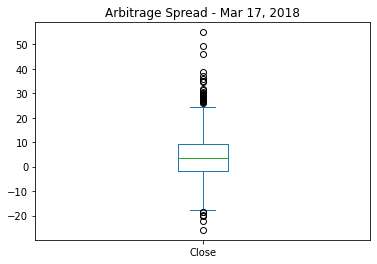

In [28]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind = 'box', title = 'Arbitrage Spread - Mar 17, 2018')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [29]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced.loc['2018-01-10 00:00:00':'2018-01-11 00:00:00'] - bitstamp_sliced.loc['2018-01-10 00:00:00':'2018-01-11 00:00:00']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.
display('Jan 10, 2018 Arbitrage Spread')
display(arbitrage_spread_early[arbitrage_spread_early>0].describe(),)

# For the date middle in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-27 00:00:00':'2018-02-28 00:00:00'] - coinbase_sliced.loc['2018-02-27 00:00:00':'2018-02-28 00:00:00']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.
display('Feb 27, 2018 Arbitrage Spread')
display(arbitrage_spread_middle[arbitrage_spread_middle>0].describe())

# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-17 00:00:00':'2018-03-18 00:00:00'] - coinbase_sliced.loc['2018-03-17 00:00:00':'2018-03-18 00:00:00']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.
display('Mar 17, 2018 Arbitrage Spread')
display(arbitrage_spread_late[arbitrage_spread_late>0].describe())


'Jan 10, 2018 Arbitrage Spread'

,Close
count,811.000000
mean,47.232713
std,35.708213
min,0.010000
25%,17.385000
50%,40.000000
75%,70.660000
max,192.000000


'Feb 27, 2018 Arbitrage Spread'

,Close
count,1325.000000
mean,16.007675
std,9.095304
min,0.010000
25%,9.040000
50%,15.260000
75%,21.670000
max,51.550000


'Mar 17, 2018 Arbitrage Spread'

,Close
count,950.000000
mean,8.491705
std,6.756356
min,0.010000
25%,3.567500
50%,6.990000
75%,11.342500
max,55.000000


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [30]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_sliced.loc['2018-01-10 00:00:00':'2018-01-11 00:00:00']

# Review the spread return DataFrame
display('Jan 10, 2018 Arbitrage Spread Return')
display(spread_return_early.head())

# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / coinbase_sliced.loc['2018-02-27 00:00:00':'2018-02-28 00:00:00']

# Review the spread return DataFrame
display('Feb 27, 2018 Arbitrage Spread Return')
display(spread_return_middle.head())

# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / coinbase_sliced.loc['2018-03-17 00:00:00':'2018-03-18 00:00:00']

# Review the spread return DataFrame
display('Mar 17, 2018 Arbitrage Spread Return')
display(spread_return_late.head())

'Jan 10, 2018 Arbitrage Spread Return'

,Close
Timestamp,
2018-01-10 00:00:00,0.001297
2018-01-10 00:01:00,0.005037
2018-01-10 00:02:00,0.003852
2018-01-10 00:03:00,0.004211
2018-01-10 00:04:00,0.001005


'Feb 27, 2018 Arbitrage Spread Return'

,Close
Timestamp,
2018-02-27 00:00:00,0.001825
2018-02-27 00:01:00,0.002556
2018-02-27 00:02:00,0.001550
2018-02-27 00:03:00,0.001944
2018-02-27 00:04:00,0.001725


'Mar 17, 2018 Arbitrage Spread Return'

,Close
Timestamp,
2018-03-17 00:00:00,0.000668
2018-03-17 00:01:00,0.000271
2018-03-17 00:02:00,0.000913
2018-03-17 00:03:00,NaN
2018-03-17 00:04:00,NaN


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [31]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01].dropna()

# Review the first five profitable trades
display('Jan 10, 2018 Profitable Arbitrage Trades')
display(profitable_trades_early.head())

# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01].dropna()

# Review the first five profitable trades
display('Feb 27, 2018 Profitable Arbitrage Trades')
display(profitable_trades_middle.head())

# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01].dropna()

# Review the first five profitable trades
display('Mar 17, 2018 Profitable Arbitrage Trades')
display(profitable_trades_late.head())

'Jan 10, 2018 Profitable Arbitrage Trades'

,Close
Timestamp,
2018-01-10 02:22:00,0.010001
2018-01-10 03:04:00,0.010719
2018-01-10 03:05:00,0.013895
2018-01-10 03:06:00,0.011597
2018-01-10 03:17:00,0.011663


'Feb 27, 2018 Profitable Arbitrage Trades'

,Close
Timestamp,


'Mar 17, 2018 Profitable Arbitrage Trades'

,Close
Timestamp,


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [32]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display('Jan 10, 2018 Profitable Arbitrage Trades')
display(profitable_trades_early.describe())

# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display('Feb 27, 2018 Profitable Arbitrage Trades')
display(profitable_trades_middle.describe())

# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display('Mar 17, 2018 Profitable Arbitrage Trades')
display(profitable_trades_late.describe())

'Jan 10, 2018 Profitable Arbitrage Trades'

,Close
count,14.000000
mean,0.011375
std,0.001300
min,0.010001
25%,0.010540
50%,0.010963
75%,0.011913
max,0.014012


'Feb 27, 2018 Profitable Arbitrage Trades'

,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


'Mar 17, 2018 Profitable Arbitrage Trades'

,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [33]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced.loc['2018-01-10 00:00:00':'2018-01-11 00:00:00']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
display('Jan 10, 2018 Profit per Trade')
display(profit_per_trade_early)

# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * coinbase_sliced.loc['2018-02-27 00:00:00':'2018-02-28 00:00:00']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the middle profit DataFrame
display('Feb 27, 2018 Profit per Trade')
display(profit_per_trade_middle)

# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * coinbase_sliced.loc['2018-03-17 00:00:00':'2018-03-18 00:00:00']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the late profit DataFrame
display('Mar 17, 2018 Profit per Trade')
display(profit_per_trade_late)

'Jan 10, 2018 Profit per Trade'

,Close
Timestamp,
2018-01-10 02:22:00,140.01
2018-01-10 03:04:00,148.70
2018-01-10 03:05:00,192.00
2018-01-10 03:06:00,160.49
2018-01-10 03:17:00,159.10
2018-01-10 03:18:00,163.00
2018-01-10 03:19:00,190.00
2018-01-10 03:34:00,137.13
2018-01-10 03:53:00,141.01


'Feb 27, 2018 Profit per Trade'

,Close
Timestamp,


'Mar 17, 2018 Profit per Trade'

,Close
Timestamp,


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [34]:
# Generate the summary statistics for the early profit per trade DataFrame
display('Jan 10, 2018 Profit per Trade')
display(profit_per_trade_early.describe())

# Generate the summary statistics for the middle profit per trade DataFrame
display('Feb 27, 2018 Profit per Trade')
display(profit_per_trade_middle.describe())

# Generate the summary statistics for the late profit per trade DataFrame
display('Mar 17, 2018 Profit per Trade')
display(profit_per_trade_late.describe())

'Jan 10, 2018 Profit per Trade'

,Close
count,14.000000
mean,155.471429
std,17.641360
min,137.130000
25%,141.095000
50%,151.490000
75%,162.372500
max,192.000000


'Feb 27, 2018 Profit per Trade'

,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


'Mar 17, 2018 Profit per Trade'

,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


<AxesSubplot:title={'center':'Profit per Trade - Mar 17, 2018'}, xlabel='Timestamp'>

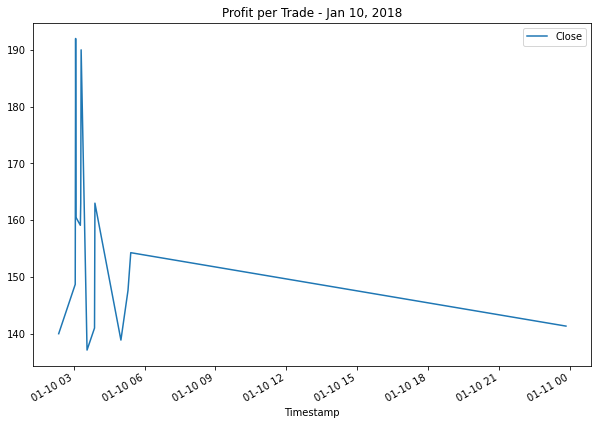

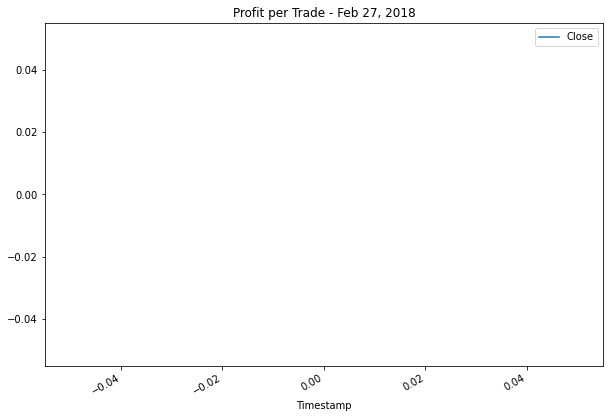

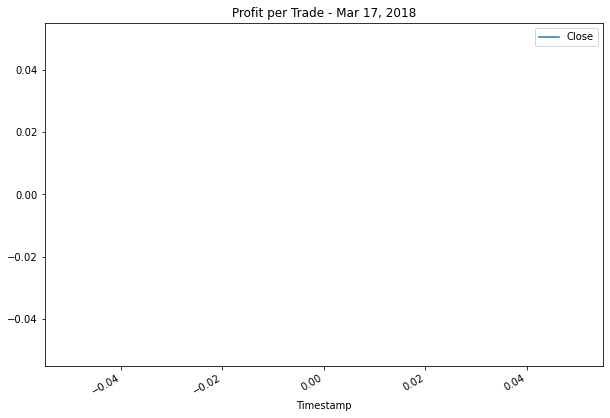

In [35]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize = (10,7), title = 'Profit per Trade - Jan 10, 2018')

# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize = (10,7), title = 'Profit per Trade - Feb 27, 2018')

# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(figsize = (10,7), title = 'Profit per Trade - Mar 17, 2018')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [36]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
display('Jan 10, 2018 Sum of Profitable Trades')
display(profit_per_trade_early.sum())

# Calculate the sum of the potential profits for the middle profit per trade DataFrame
display('Feb 27, 2018 Sum of Profitable Trades')
display(profit_per_trade_middle.sum())

# Calculate the sum of the potential profits for the late profit per trade DataFrame
display('Mar 17, 2018 Sum of Profitable Trades')
display(profit_per_trade_late.sum())

'Jan 10, 2018 Sum of Profitable Trades'

Close    2176.6
dtype: float64

'Feb 27, 2018 Sum of Profitable Trades'

Close    0.0
dtype: float64

'Mar 17, 2018 Sum of Profitable Trades'

Close    0.0
dtype: float64

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [37]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - Mar 17, 2018'}, xlabel='Timestamp'>

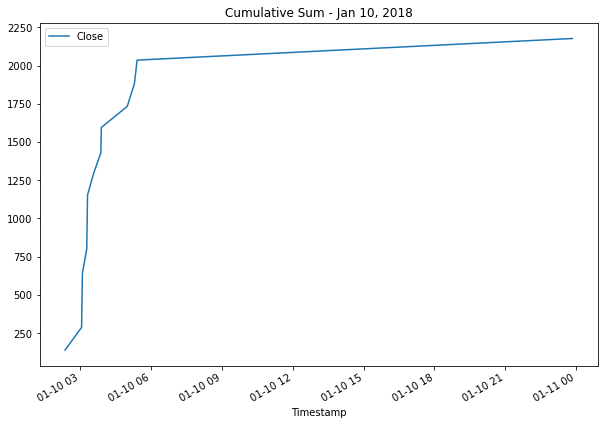

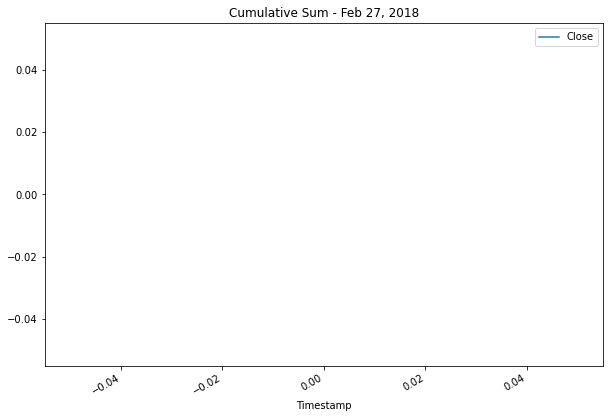

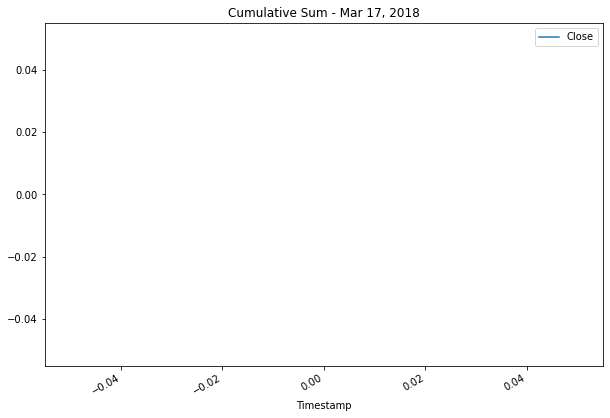

In [38]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize = (10,7), title = 'Cumulative Sum - Jan 10, 2018')

# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(figsize = (10,7), title = 'Cumulative Sum - Feb 27, 2018')

# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(figsize = (10,7), title = 'Cumulative Sum - Mar 17, 2018')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Looking at just the first date (since that was the only date with arbitrage profits), it seems the opportunity for arbitrage profit exists early in the day just after opening. After the first few hours, the exchanges seemed to stabilize and remove opportunity for arbitrage profits.